# Importing Datas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head(9)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0


In [26]:
df['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [3]:
# Checking Unique datas in each features.
print(df['hypertension'].unique())
print(df['gender'].unique())
print(df['heart_disease'].unique())
print(df['smoking_history'].unique())
print(df['bmi'].unique())
print(df['HbA1c_level'].unique())
print(df['blood_glucose_level'].unique())

[0 1]
['Female' 'Male' 'Other']
[1 0]
['never' 'No Info' 'current' 'former' 'ever' 'not current']
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]


# EDA dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
# Checking null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
# Checking duplicates
df.duplicated().sum()

3854

In [9]:
# Removing Duplicate Data
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [12]:
# Categorical data means data which is note numerical and which is the term of some category such as male/female etc
categorical_data=['gender','smoking_history']

In [13]:
# Quantitative data means numerical datas
for x in categorical_data:
    quantitive_data=df.drop(columns={x})

# Pre-Processing

In [14]:
# Encoding the categorical data as machine can only be train with numeric datas.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_data:
    df.loc[:,i]=le.fit_transform(df.loc[:,i])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [16]:
# Converting datatype of categorical datas into integer as they are object data type.
df[categorical_data]=df[categorical_data].astype('int')

In [17]:
df.head(9)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0


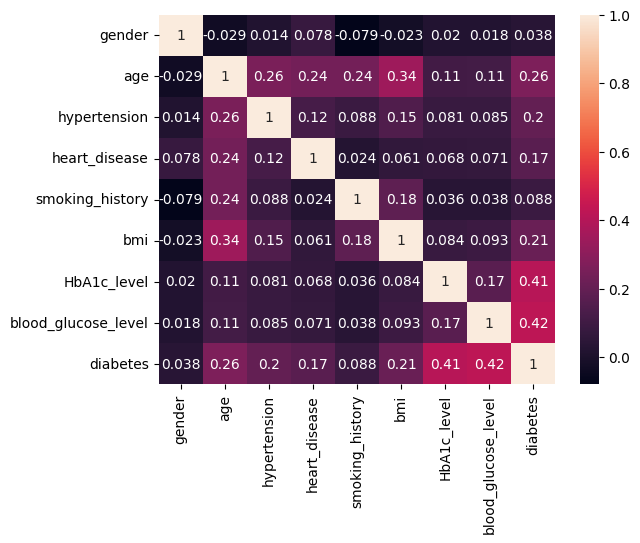

In [18]:
# plotting heatmap to see correlation between features
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [19]:
# As we can see diabetes is mostly affected by blood glucose level and HbA1c Level.

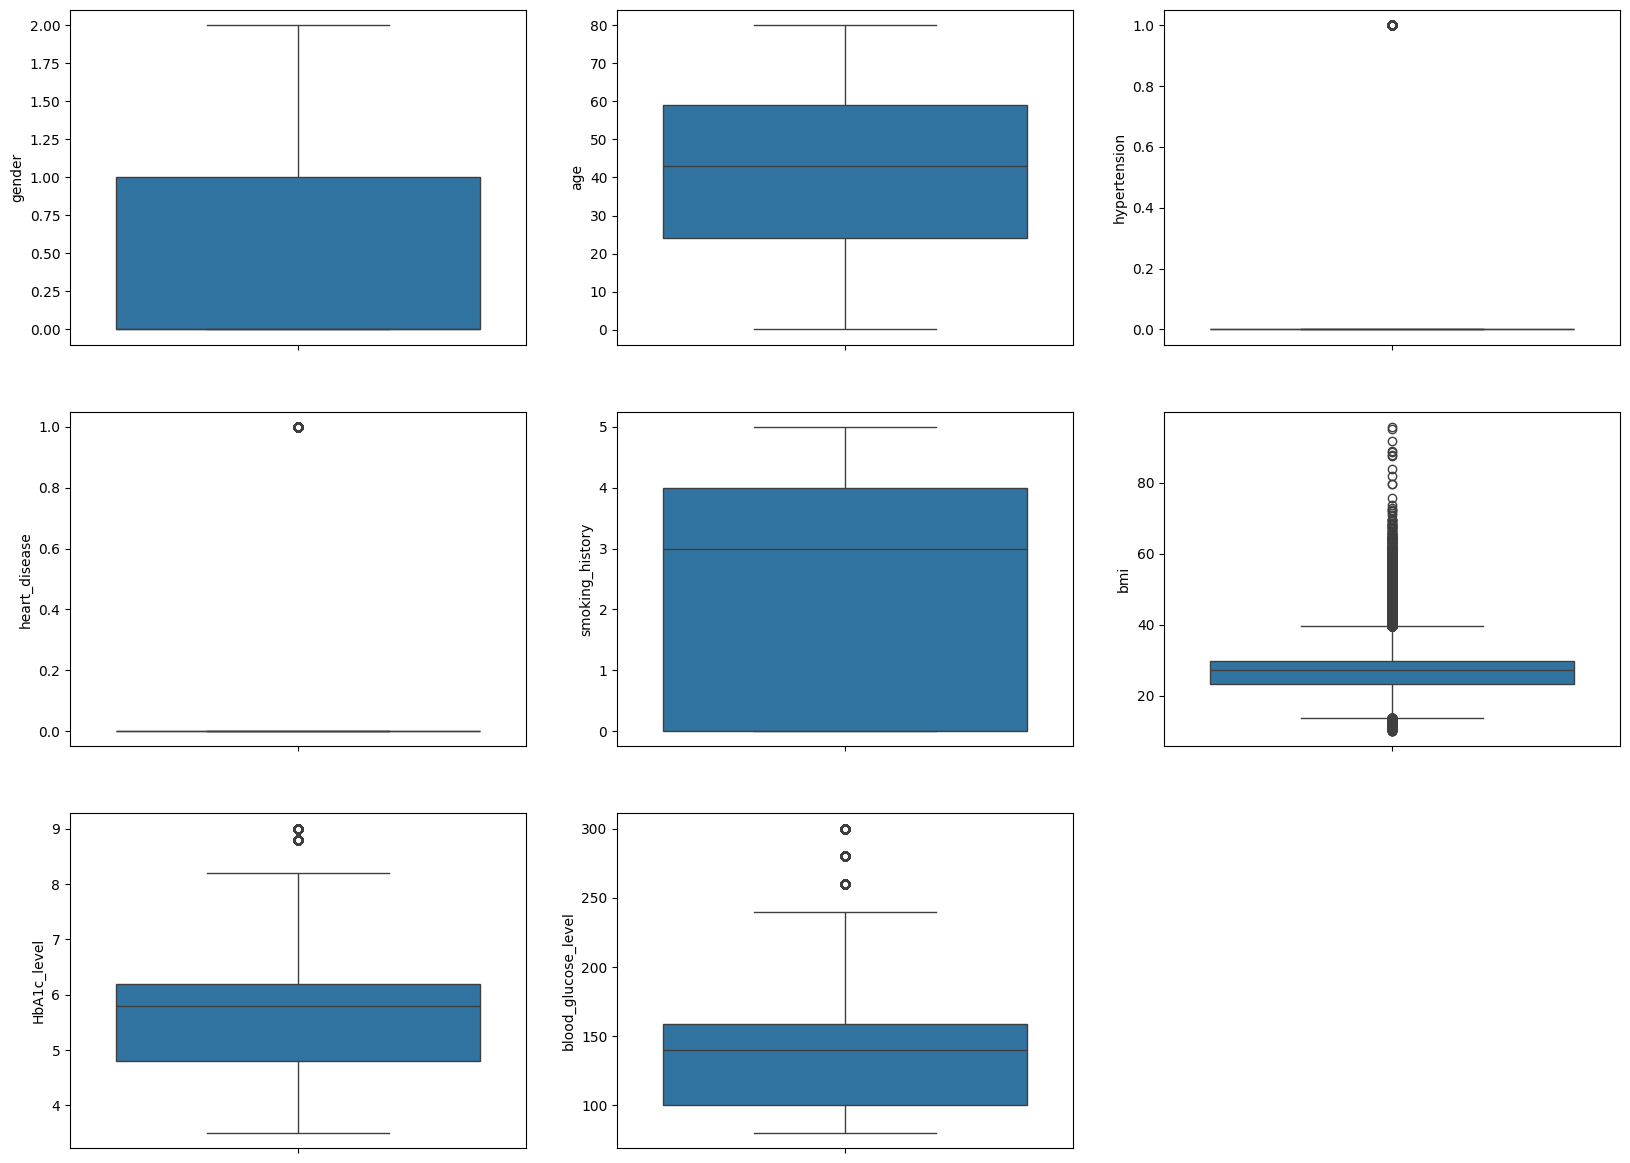

In [20]:
# Cheking if our data contains outliers.
x=df.drop(columns={'diabetes'})
y=df['diabetes']
# Checking Outliers
j=1
plt.figure(figsize=(20,20))
for i in x:
    plt.subplot(4,3,j)
    sns.boxplot(y=i,data=df)
    plt.xticks(rotation=90)
    j+=1
plt.show()

In [21]:
features=df.drop(columns={'diabetes','hypertension','heart_disease'},axis=1)

In [22]:
# capping to outliers to remove them.
def cap_outliers(df,columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    IQR=q3-q1
    lb=q1-1.5*IQR
    ub=q3+1.5*IQR
    df[columns]=df[columns].apply(lambda a : lb if a<lb else ub if a>ub else a)
    return df
for column in features:
    df=cap_outliers(df,column)

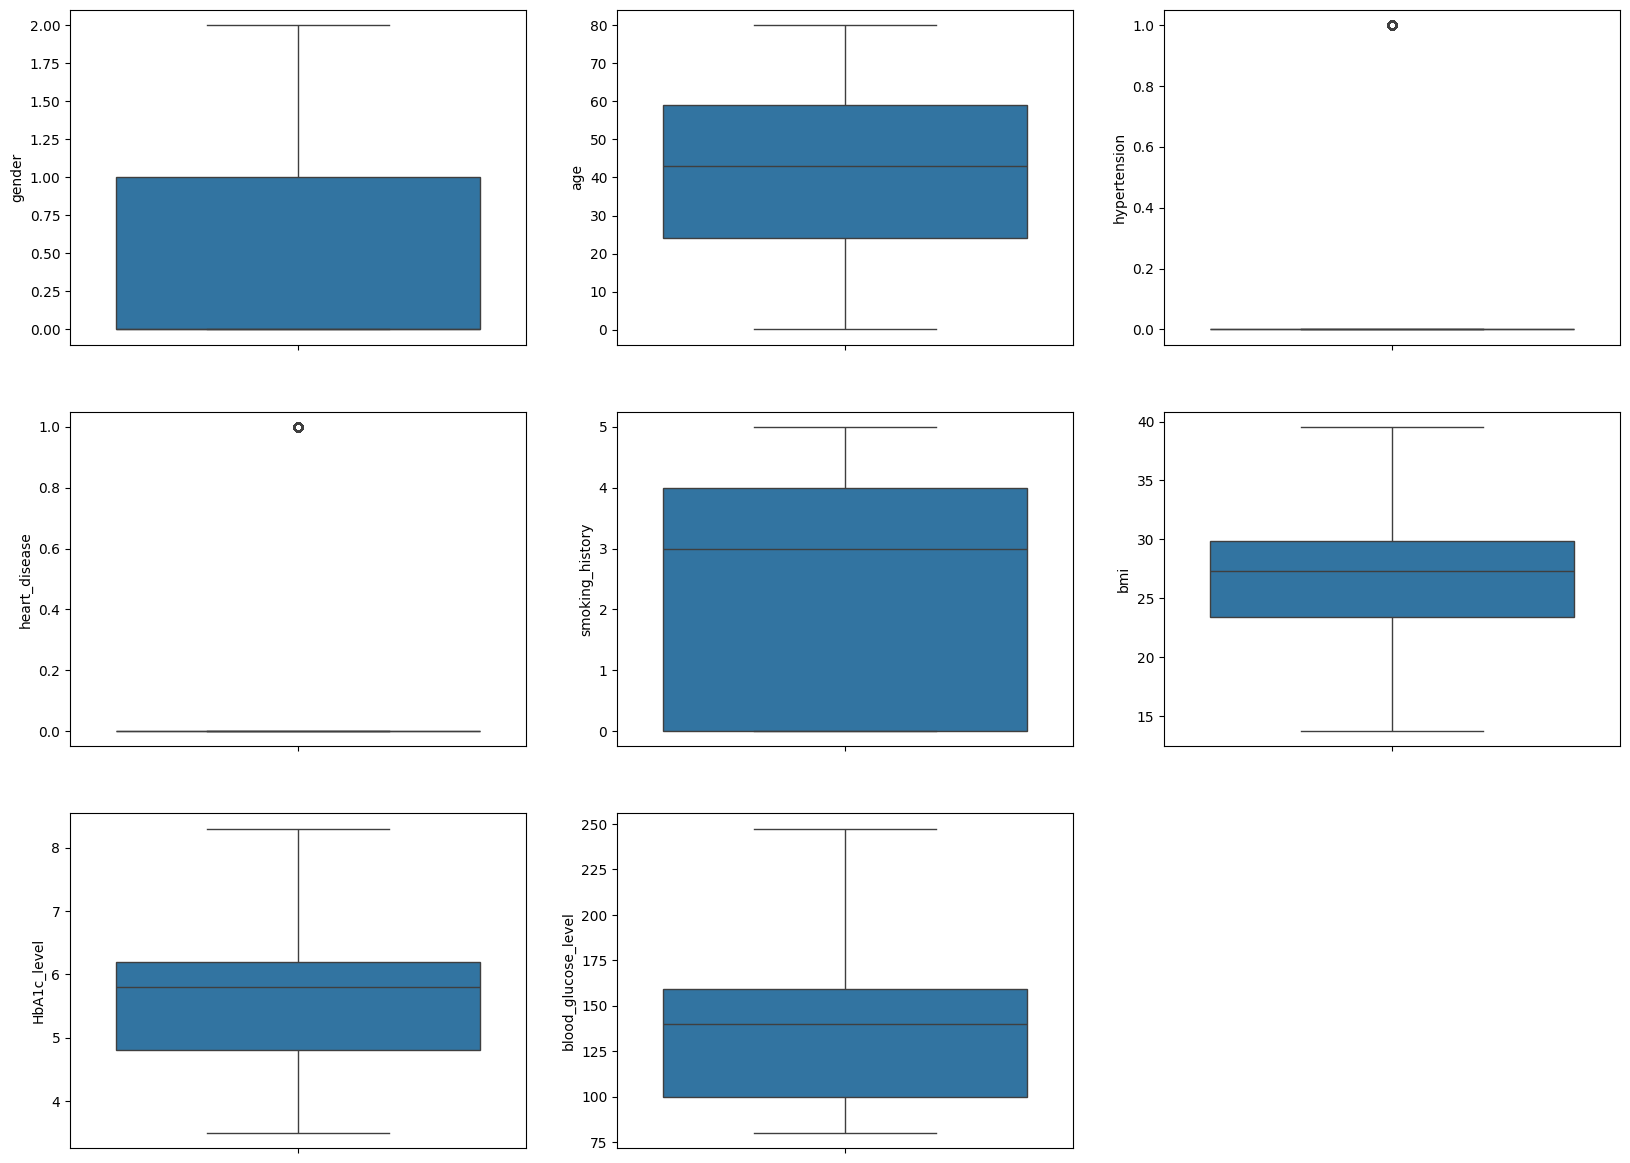

In [23]:
# box plot to check if any outliers remains
j=1
plt.figure(figsize=(20,20))
for i in x:
    plt.subplot(4,3,j)
    sns.boxplot(y=i,data=df)
    plt.xticks(rotation=90)
    j+=1
plt.show()

In [24]:
# Checking size of df after removing outliers
df.shape

(96146, 9)

In [27]:
# Spliting the data set into 2 parts , test data ana
from sklearn.model_selection import train_test_split
x=df.drop(columns={'diabetes'})
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42) 
# as our data contains 10% diabetic and 90 % non-diabetic so while splitting data there may
#  be imbalance such as x_train may contain all non diabetic and only 1 diabetic data. 
# so if we use stratify=y it will split data such that diabetic is 10% and non diabetic is 90%

In [28]:
x_train.shape

(76916, 8)

In [29]:
y_test.shape

(19230,)

In [30]:
y_train.value_counts()

diabetes
0    70130
1     6786
Name: count, dtype: int64

# Standardizing train dataset

In [31]:
# We will be trainin our data on diff algo such as knn so scaling is necessary
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train1=sc.fit_transform(x_train) # we fit and transform x_train data
x_test1=sc.fit_transform(x_test) # we transform only x_test data

In [32]:
x_train1

array([[ 1.18028886,  0.14416386, -0.29087307, ..., -0.53297742,
         0.16928346, -0.29567228],
       [-0.84598389,  0.98982547, -0.29087307, ...,  1.01346549,
        -1.45144002, -0.29567228],
       [-0.84598389,  0.14416386, -0.29087307, ...,  0.04947105,
         1.02731353, -0.29567228],
       ...,
       [-0.84598389, -0.25641269, -0.29087307, ...,  0.04947105,
         1.02731353, -1.48539186],
       [ 1.18028886,  0.76728294, -0.29087307, ...,  1.82889336,
         0.64596683,  2.8467392 ],
       [-0.84598389, -0.79051476, -0.29087307, ...,  0.04947105,
         0.64596683, -1.35607451]])

In [33]:
x_test1

array([[-8.33410428e-01,  4.04234294e-01, -2.86743521e-01, ...,
         1.64610457e+00,  1.01504399e+00,  5.47796997e-01],
       [ 1.19782944e+00, -1.33348684e+00, -2.86743521e-01, ...,
        -8.05314409e-01, -9.81581488e-01, -1.24270554e+00],
       [-8.33410428e-01,  8.05246863e-01,  3.48743712e+00, ...,
         1.21778344e+00,  6.34734373e-01, -1.24270554e+00],
       ...,
       [-8.33410428e-01,  3.22172483e-03, -2.86743521e-01, ...,
        -4.48097969e-01, -9.81581488e-01,  1.84506627e-01],
       [-8.33410428e-01,  5.82462102e-01, -2.86743521e-01, ...,
         3.57755232e-01,  1.59347355e-01, -1.50219866e+00],
       [ 1.19782944e+00, -1.24437293e+00, -2.86743521e-01, ...,
        -1.39977627e-01, -1.93235552e+00, -1.24270554e+00]])

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [35]:
# training model using Logistic Regression
log_regression=LogisticRegression()
log_regression.fit(x_train1,y_train)
y_predict1=log_regression.predict(x_test1)

In [36]:
# training model using Support Vector Classifier
support_vector=SVC()
support_vector.fit(x_train1,y_train)
y_predict2=support_vector.predict(x_test1)

In [37]:
# training model using Gradient Booster Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict3=(gb.predict_proba(x_test)[:, 1] >= 0.4).astype(int)

In [38]:
# training model using Random Forest Classifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_predict4=(random_forest.predict_proba(x_test)[:, 1] >= 0.4).astype(int)

In [39]:
# training model using K Nearest Neighbour CLassifier(KNN)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train1,y_train)
y_predict5=knn.predict(x_test1)

In [38]:
# training model using Extreme Boosting CLassifier (XGBoost)
xgb_model=xgb.XGBClassifier(scale_pos_weight=3) 
# scale_pos weight = total number of 0/total number of 1 in diabetes,It is used to balance the dataset if they contain unstable data such as ours
# But using 10.33 increases recall but decreases accuracy and overall balance so after testing scale_pos_weight from 2-8 the most balance result was at 3
xgb_model.fit(x_train,y_train)
y_predict6 = (xgb_model.predict_proba(x_test)[:, 1] >= 0.65).astype(int) 
 # Using 0.65 as threshold i.e it finds probability and if the chance is >=0.65 then it is counted as 1. By default the threshold is 0.5 i.e., if prob is >0.5 -> diabetes and
#  prob <0.5-> non-diabetic. so we tested threshold from 0.4 to 0.8 and the best outcome was at 0.65.

# Evaluating the algorithms

In [39]:
# Classification Report gives precision,recall,f1score and accuray.
from sklearn.metrics import classification_report
print("Using Logistic Regression \n",classification_report(y_test,y_predict1),"\n\n")
print("Using Support Vector Classifier \n",classification_report(y_test,y_predict2),"\n\n")
print("Using Gradient Booster Classifier \n",classification_report(y_test,y_predict3),"\n\n")
print("Using Random Forest Classifier \n",classification_report(y_test,y_predict4),"\n\n")
print("Using KNN \n",classification_report(y_test,y_predict5),"\n\n")
print("Using XGBoost \n",classification_report(y_test,y_predict6),"\n\n")

Using Logistic Regression 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17534
           1       0.86      0.63      0.73      1696

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230
 


Using Support Vector Classifier 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     17534
           1       0.97      0.59      0.74      1696

    accuracy                           0.96     19230
   macro avg       0.97      0.79      0.86     19230
weighted avg       0.96      0.96      0.96     19230
 


Using Gradient Booster Classifier 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       0.94      0.70      0.80      1696

    accuracy                           0.97     19230
   macro avg       0.96 

In [40]:
# Joblib is used for creating a joblib file which is used in django to predict user inputed data.
import joblib
joblib.dump(xgb_model,'Diabetes_Predictor.joblib')
model=joblib.load('Diabetes_Predictor.joblib')

In [41]:
model.predict([[0	,80.0	,0	,1	,4	,25.19	,6.6	,140.0	]]) #correct

array([0])

In [42]:
model.predict([[1,	76.0,	1,	1,	1	,20.14	,4.8	,155.0	]]) #correct

array([0])

In [43]:
model.predict([[0	,44.0	,0	,0,	4,	19.31	,6.5	,200.0	]]) #correct

array([1])

In [44]:
model.predict([[0,	61.0,	0,	0,	5	,39.36,	8.3	,140.0	]]) #correct and working

array([1])

In [45]:
model.predict([[0	,36.0	,0,	0,	1	,32.27	,6.2	,220.0]]) #correct

array([1])